In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)


In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [9]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)


603

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b8f62c40b904f8c077d3fbe88327ae7


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [13]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 & i >= 50):
        set_count = set_count + 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count = record_count + 1
        
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | pitimbu
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | the valley
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | mangan
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | bonthe
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22

Processing Record 186 of Set 1 | puerto escondido
Processing Record 187 of Set 1 | lysyye gory
Processing Record 188 of Set 1 | mercedes
Processing Record 189 of Set 1 | boyabat
Processing Record 190 of Set 1 | qaanaaq
Processing Record 191 of Set 1 | san quintin
Processing Record 192 of Set 1 | butaritari
Processing Record 193 of Set 1 | miquelon
Processing Record 194 of Set 1 | port lincoln
Processing Record 195 of Set 1 | mangaldai
Processing Record 196 of Set 1 | westport
Processing Record 197 of Set 1 | airai
Processing Record 198 of Set 1 | sabang
Processing Record 199 of Set 1 | visby
Processing Record 200 of Set 1 | cidreira
Processing Record 201 of Set 1 | esmeraldas
Processing Record 202 of Set 1 | samusu
City not found. Skipping...
Processing Record 203 of Set 1 | flin flon
Processing Record 204 of Set 1 | bogalusa
Processing Record 205 of Set 1 | honningsvag
Processing Record 206 of Set 1 | saint-georges
Processing Record 207 of Set 1 | san patricio
Processing Record 208 of

Processing Record 367 of Set 1 | padang
Processing Record 368 of Set 1 | nan
Processing Record 369 of Set 1 | codrington
Processing Record 370 of Set 1 | preobrazheniye
Processing Record 371 of Set 1 | zhanaozen
Processing Record 372 of Set 1 | praia da vitoria
Processing Record 373 of Set 1 | eldikan
City not found. Skipping...
Processing Record 374 of Set 1 | sur
Processing Record 375 of Set 1 | carutapera
Processing Record 376 of Set 1 | qeshm
Processing Record 377 of Set 1 | marion
Processing Record 378 of Set 1 | yar-sale
Processing Record 379 of Set 1 | halalo
City not found. Skipping...
Processing Record 380 of Set 1 | dillon
Processing Record 381 of Set 1 | tambopata
Processing Record 382 of Set 1 | the pas
Processing Record 383 of Set 1 | tazovskiy
Processing Record 384 of Set 1 | jiddah
City not found. Skipping...
Processing Record 385 of Set 1 | kushiro
Processing Record 386 of Set 1 | namibe
Processing Record 387 of Set 1 | rocha
Processing Record 388 of Set 1 | acajutla
Pr

Processing Record 549 of Set 1 | vostok
Processing Record 550 of Set 1 | fukue
Processing Record 551 of Set 1 | catuday
Processing Record 552 of Set 1 | kirakira
Processing Record 553 of Set 1 | jerome
Processing Record 554 of Set 1 | kenora
Processing Record 555 of Set 1 | talnakh
Processing Record 556 of Set 1 | ambilobe
Processing Record 557 of Set 1 | kupang
Processing Record 558 of Set 1 | nuneaton
Processing Record 559 of Set 1 | lukovetskiy
Processing Record 560 of Set 1 | kijang
Processing Record 561 of Set 1 | ransang
Processing Record 562 of Set 1 | lasa
Processing Record 563 of Set 1 | oga
Processing Record 564 of Set 1 | hundested
Processing Record 565 of Set 1 | nabire
Processing Record 566 of Set 1 | neiafu
Processing Record 567 of Set 1 | sonoita
Processing Record 568 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 569 of Set 1 | cheyenne
Processing Record 570 of Set 1 | pilao arcado
City not found. Skipping...
Processing Record 571 of Set 1 | olafsvik


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,59.00,71,52,9.35,AU,2020-10-27 15:46:24
1,Bluff,-46.60,168.33,39.99,90,4,1.01,NZ,2020-10-27 15:46:34
2,Pitimbu,-7.47,-34.81,86.00,58,40,11.41,BR,2020-10-27 15:46:34
3,Punta Arenas,-53.15,-70.92,46.00,49,92,18.99,CL,2020-10-27 15:46:34
4,Bredasdorp,-34.53,20.04,71.60,56,88,21.92,ZA,2020-10-27 15:46:35
5,The Valley,18.22,-63.06,86.00,83,75,17.22,AI,2020-10-27 15:46:35
6,Cabo San Lucas,22.89,-109.91,79.00,64,5,6.44,MX,2020-10-27 15:46:36
7,Mangan,27.52,88.53,65.34,34,0,5.06,IN,2020-10-27 15:46:37
8,Fortuna,40.60,-124.16,44.60,56,1,10.29,US,2020-10-27 15:46:37
9,Hobart,-42.88,147.33,48.20,93,90,4.70,AU,2020-10-27 15:44:27


In [17]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-10-27 15:46:24,-33.65,115.33,59.00,71,52,9.35
1,Bluff,NZ,2020-10-27 15:46:34,-46.60,168.33,39.99,90,4,1.01
2,Pitimbu,BR,2020-10-27 15:46:34,-7.47,-34.81,86.00,58,40,11.41
3,Punta Arenas,CL,2020-10-27 15:46:34,-53.15,-70.92,46.00,49,92,18.99
4,Bredasdorp,ZA,2020-10-27 15:46:35,-34.53,20.04,71.60,56,88,21.92
5,The Valley,AI,2020-10-27 15:46:35,18.22,-63.06,86.00,83,75,17.22
6,Cabo San Lucas,MX,2020-10-27 15:46:36,22.89,-109.91,79.00,64,5,6.44
7,Mangan,IN,2020-10-27 15:46:37,27.52,88.53,65.34,34,0,5.06
8,Fortuna,US,2020-10-27 15:46:37,40.60,-124.16,44.60,56,1,10.29
9,Hobart,AU,2020-10-27 15:44:27,-42.88,147.33,48.20,93,90,4.70


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = 'City_ID')


In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


In [22]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.strftime('%x')


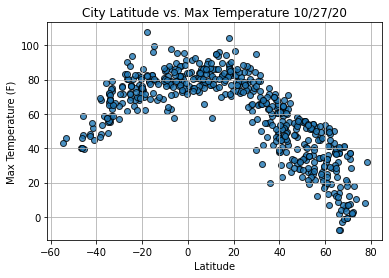

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temp, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()


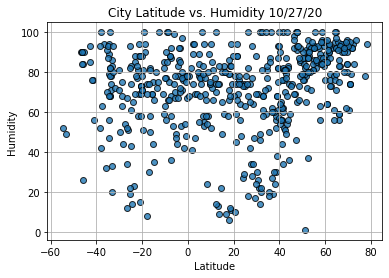

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()


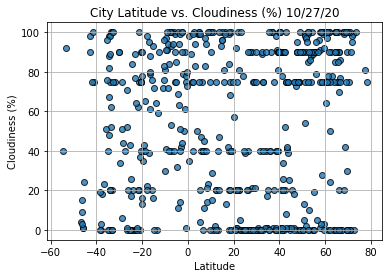

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

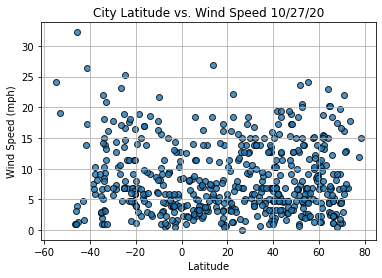

In [28]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor = 'black', linewidths = 1, marker = 'o', alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

In [81]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [161]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

In [162]:
index13 = city_data_df.loc[13]
index13


City                     Khatanga
Country                        RU
Date          2020-10-27 15:46:28
Lat                         71.97
Lng                         102.5
Max Temp                     3.06
Humidity                       94
Cloudiness                     99
Wind Speed                  12.91
Name: 13, dtype: object

In [163]:
# Create Northern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
northern_hemi_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,The Valley,AI,2020-10-27 15:46:35,18.22,-63.06,86.00,83,75,17.22
6,Cabo San Lucas,MX,2020-10-27 15:46:36,22.89,-109.91,79.00,64,5,6.44
7,Mangan,IN,2020-10-27 15:46:37,27.52,88.53,65.34,34,0,5.06
8,Fortuna,US,2020-10-27 15:46:37,40.60,-124.16,44.60,56,1,10.29
10,Hilo,US,2020-10-27 15:44:34,19.73,-155.09,73.40,88,75,5.82


In [164]:
# Create Southern Hemisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]
southern_hemi_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-10-27 15:46:24,-33.65,115.33,59.00,71,52,9.35
1,Bluff,NZ,2020-10-27 15:46:34,-46.60,168.33,39.99,90,4,1.01
2,Pitimbu,BR,2020-10-27 15:46:34,-7.47,-34.81,86.00,58,40,11.41
3,Punta Arenas,CL,2020-10-27 15:46:34,-53.15,-70.92,46.00,49,92,18.99
4,Bredasdorp,ZA,2020-10-27 15:46:35,-34.53,20.04,71.60,56,88,21.92


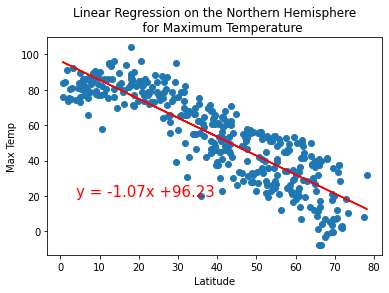

In [165]:
# Linear regression on the Northern Hemisphere for maximum temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere
    for Maximum Temperature''', 'Max Temp', (4, 20))


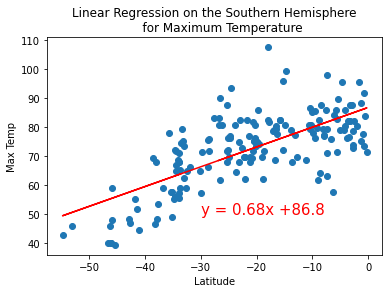

In [166]:
# Linear regression on the Southern Hemisphere for maximum temperature
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
    for Maximum Temperature''', 'Max Temp', (-30, 50))


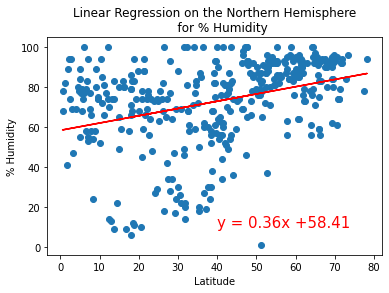

In [179]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere
    for % Humidity''', '% Humidity', (40, 10))


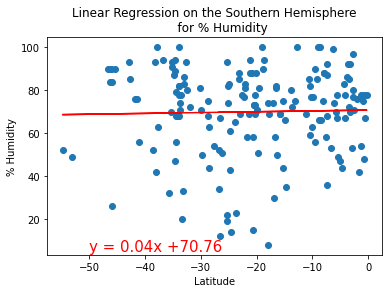

In [180]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
    for % Humidity''', '% Humidity', (-50, 5))


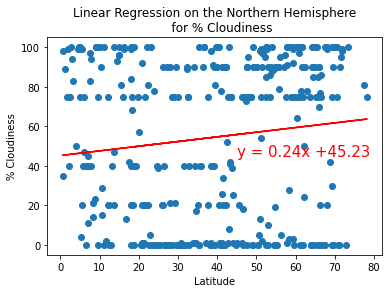

In [185]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere
    for % Cloudiness''', '% Cloudiness', (45, 45))


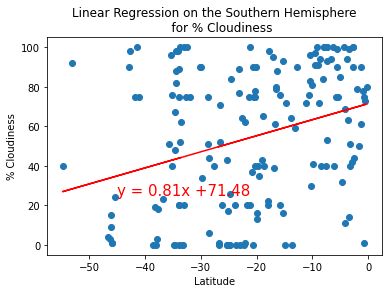

In [188]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
    for % Cloudiness''', '% Cloudiness', (-45, 25))


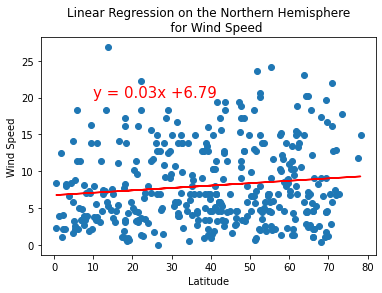

In [191]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere
    for Wind Speed''', 'Wind Speed', (10, 20))


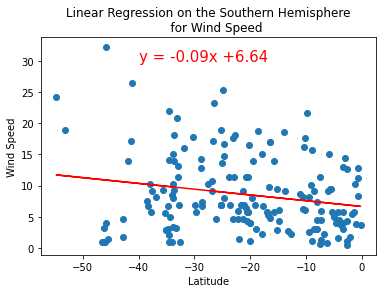

In [194]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere
    for Wind Speed''', 'Wind Speed', (-40, 30))
